# HW04: การแทนคำ (Word Representation)

การแทนคำถือว่าเป็นอีกหนึ่งอย่างที่มีความสำคัญในงานด้าน NLP ในส่วนนี้จะได้เรียนรู้การแทนคำด้วยวิธีต่างๆ ดังนี้

1) TF-IDF

2) CBOW

3) Skip-gram

นอกจากนั้นเรายังจะได้ประยุกต์ใช้งาน  Pretrained-model ต่างๆ เช่น ULMFit Language Modeling


# TF-IDF

## ศึกษาการทำงานของ TF-IDF

ในส่วนนี้เราจะมาคำนวนค่า TF-IDF กัน ดัดแปลงโค้ดจาก https://github.com/Ash007-kali/Article-Datasets/tree/main/TF-IDF%20Model%20from%20Scratch

In [1]:
!pip install nltk

In [2]:

import numpy as np
from nltk.tokenize import  word_tokenize
import nltk
nltk.download('punkt')

#Example text corpus for our tutorial
text = ['Topic sentences are similar to mini thesis statements. ',
        'the topic sentence is the main point of the paragraph',
        'whereas a paragraph is unified if all the sentences relate to the topic sentence.']

#Preprocessing the text data
sentences = []
word_set = []

for sent in text:
    x = [i.lower() for  i in word_tokenize(sent) if i.isalpha()]
    sentences.append(x)
    for word in x:
        if word not in word_set:
            word_set.append(word)
#Set of vocab
word_set = set(word_set)
#Total documents in our corpus
total_documents = len(sentences)

#Creating an index for each word in our vocab.
index_dict = {} #Dictionary to store index for each word
i = 0
for word in word_set:
    index_dict[word] = i
    i += 1

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
print(word_set)
print(index_dict)

{'thesis', 'if', 'point', 'is', 'relate', 'sentences', 'main', 'similar', 'sentence', 'the', 'whereas', 'statements', 'topic', 'a', 'paragraph', 'to', 'of', 'unified', 'are', 'mini', 'all'}
{'thesis': 0, 'if': 1, 'point': 2, 'is': 3, 'relate': 4, 'sentences': 5, 'main': 6, 'similar': 7, 'sentence': 8, 'the': 9, 'whereas': 10, 'statements': 11, 'topic': 12, 'a': 13, 'paragraph': 14, 'to': 15, 'of': 16, 'unified': 17, 'are': 18, 'mini': 19, 'all': 20}


In [4]:
#Create a count dictionary นับคำว่าเกิดขึ้นกี่ครั้ง
def count_dict(sentences):
    word_count = {}
    for word in word_set:
        word_count[word] = 0
        for sent in sentences:
            if word in sent:
                word_count[word] += 1
    return word_count

word_count = count_dict(sentences)

In [5]:
print(word_count)

{'thesis': 1, 'if': 1, 'point': 1, 'is': 2, 'relate': 1, 'sentences': 2, 'main': 1, 'similar': 1, 'sentence': 2, 'the': 2, 'whereas': 1, 'statements': 1, 'topic': 3, 'a': 1, 'paragraph': 2, 'to': 2, 'of': 1, 'unified': 1, 'are': 1, 'mini': 1, 'all': 1}


In [6]:
#Term Frequency ความถี่ การเกิดขึ้นกี่ครั้ง
def termfreq(document, word):
    N = len(document)
    occurance = len([token for token in document if token == word])
    return occurance/N

In [7]:
#Inverse Document Frequency

def inverse_doc_freq(word):
    try:
        word_occurance = word_count[word] + 1
    except:
        word_occurance = 1
    return np.log(total_documents/word_occurance)

In [8]:
def tf_idf(sentence):
    tf_idf_vec = np.zeros((len(word_set),))
    for word in sentence:
        tf = termfreq(sentence,word)
        idf = inverse_doc_freq(word)

        value = tf*idf
        tf_idf_vec[index_dict[word]] = value
    return tf_idf_vec

In [9]:
vectors = []
for sent in sentences:
    vec = tf_idf(sent)
    vectors.append(vec)

In [10]:
vectors[0].shape

(21,)

In [11]:
vectors[0]

array([ 0.05068314,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.05068314,  0.        ,  0.        ,
        0.        ,  0.05068314, -0.03596026,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.05068314,  0.05068314,
        0.        ])

In [12]:
vectors[1]

array([ 0.        ,  0.        ,  0.04054651,  0.        ,  0.        ,
        0.        ,  0.04054651,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.02876821,  0.        ,  0.        ,
        0.        ,  0.04054651,  0.        ,  0.        ,  0.        ,
        0.        ])

In [13]:
#หาความยาว
print(word_set)
len(word_set)


{'thesis', 'if', 'point', 'is', 'relate', 'sentences', 'main', 'similar', 'sentence', 'the', 'whereas', 'statements', 'topic', 'a', 'paragraph', 'to', 'of', 'unified', 'are', 'mini', 'all'}


21

จากตัวอย่างจะเห็นว่าเรามีคลังข้อความทั้งหมด 3 ประโยค โดยมีคำที่ไม่ซ้ำกันอยู่ 37 คำ


ถ้าเราจะแทนแต่ละประโยคเราก็สามารถนำค่า TF-IDF ไปใช้ได้เลย แต่ถ้าอยากนำค่าที่ได้ไปแทนคำต้องทำการแปลงเอา vector ของคำ ดังนี้


In [14]:
#หา vector
for i,sv in enumerate(vectors):
  print("Vector of sen",i)
  print(sv)

vector_of_words = np.transpose(np.array(vectors))
print(vector_of_words.shape)

print("Vector of word = ",list(word_set)[0])
print(vector_of_words[1])

Vector of sen 0
[ 0.05068314  0.          0.          0.          0.          0.
  0.          0.05068314  0.          0.          0.          0.05068314
 -0.03596026  0.          0.          0.          0.          0.
  0.05068314  0.05068314  0.        ]
Vector of sen 1
[ 0.          0.          0.04054651  0.          0.          0.
  0.04054651  0.          0.          0.          0.          0.
 -0.02876821  0.          0.          0.          0.04054651  0.
  0.          0.          0.        ]
Vector of sen 2
[ 0.          0.02896179  0.          0.          0.02896179  0.
  0.          0.          0.          0.          0.02896179  0.
 -0.02054872  0.02896179  0.          0.          0.          0.02896179
  0.          0.          0.02896179]
(21, 3)
Vector of word =  thesis
[0.         0.         0.02896179]


## ตัวอย่างการนำ TF-IDF ไปใช้งานกับ ChatBot

จากการบ้านครั้งก่อนที่เราทำแชทบอท เราจะใช้วิธีเปลี่ยนเทียบข้อความโดยทำการวนซ้ำแล้วนับว่าประโยคไหนมีคำเหมือนกันมากสุดก็เอามาเป็นคำตอบ

ในส่วนนี้เราจะเก่งขึ้นอีกขั้น เราจะใช้ Tf-IDF นี้หล่ะมาใช้ในการเปรียบเทียบคำถาม เอาหล่ะ ไปเริ่มกันเลย



In [15]:
!wget https://raw.githubusercontent.com/pongsathon/nlp_datasets/main/HW_04/dict_chitchat_th.json

!pip install pythainlp

--2023-12-08 10:44:36--  https://raw.githubusercontent.com/pongsathon/nlp_datasets/main/HW_04/dict_chitchat_th.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2133070 (2.0M) [text/plain]
Saving to: ‘dict_chitchat_th.json’

dict_chitchat_th.js 100%[===================>]   2.03M  --.-KB/s    in 0.07s   

2023-12-08 10:44:36 (28.0 MB/s) - ‘dict_chitchat_th.json’ saved [2133070/2133070]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 68.1 MB/s eta 0:00:00


In [16]:
import json

qa_data = {}

with open("dict_chitchat_th.json") as json_file:
  qa_data = json.load(json_file)

#print five questions
list(qa_data.keys())[0:5]

['เจ็บไหม?', 'คุณมีนิ้วไหม', 'คุณเคยหายใจไหม', 'คุณบดเคี้ยว?', 'คุณอ้วกได้ไหม']

In [17]:
qa_data['คุณมีนิ้วไหม']

'ฉันไม่มีร่างกาย'

In [18]:
from pythainlp.tokenize import word_tokenize
#เขียนโค้เพิ่มเพื่อ ให้คำนวน TF-IDF ของข้อมูลคำถาม ใช้โค้ดตัวอย่างจากส่วนที่ 1
questions = list(qa_data.keys()) # คำถามเก็บอยู่ตัวแปร question แล้ว

print(questions)

['เจ็บไหม?', 'คุณมีนิ้วไหม', 'คุณเคยหายใจไหม', 'คุณบดเคี้ยว?', 'คุณอ้วกได้ไหม', 'คุณเหนื่อยไหม', 'คุณสามารถคลาน?', 'คุณร้องไห้ได้ไหม', 'ฝันไปไหม', 'คุณเคยฉี่ไหม?', 'คุณเคยเจ็บปวดไหม?', 'คุณหายใจได้ไหม', 'คุณสามารถบดเคี้ยว?', 'เรอได้ไหม', 'เคี้ยวได้ไหม', 'ฝันได้ไหม', 'คุณกินได้ไหม', 'คุณผายลมได้ไหม', 'คุณหายใจ', 'เหนื่อยมั้ย?', 'หาวได้ไหม', 'คุณสามารถฉี่?', 'คุณสามารถเซ่อ?', 'คุณจามได้ไหม', 'คุณสามารถขับเหงื่อ?', 'อาเจียนได้ไหม', 'หายเจ็บได้ไหม?', 'คุณเหงื่อออก?', 'คุณมีผิวหรือไม่?', 'คุณมีฟันไหม', 'คุณมีนิ้วเท้าหรือไม่?', 'คุณฉี่?', 'คุณเซ่อ?', 'คุณเคยเหนื่อยไหม?', 'คุณจาม?', 'คุณมีผมไหม?', 'คุณอ้วกหรือเปล่า', 'คุณอาเจียนหรือไม่?', 'คุณหาว?', 'คุณไม่เคยเคี้ยว?', 'คุณไม่เคยนอนเหรอ?', 'ท้องมั้ย?', 'คุณมีลำไส้หรือไม่?', 'คุณนอนหลับ?', 'คุณเคยเซ่อไหม?', 'คุณเคยจามไหม?', 'คุณเคยเหงื่อออกไหม?', 'คุณเคยอ้วกไหม?', 'คุณเคยอาเจียนไหม?', 'คุณเคยเดิน', 'คุณเคยหาวไหม?', 'คุณมีปอดหรือไม่?', 'คุณมีขาไหม', 'คุณได้รับสิว?', 'คุณมีตับหรือไม่?', 'คุณมีแขนหรือไม่?', 'คุณมีตาไหม?', 'คุณมีเล็บมือหรือไม่?', 

In [19]:
from pythainlp.tokenize import word_tokenize
#เขียนโค้เพิ่มเพื่อ ให้คำนวน TF-IDF ของข้อมูลคำถาม ใช้โค้ดตัวอย่างจากส่วนที่ 1
questions = list(qa_data.keys()) # คำถามเก็บอยู่ตัวแปร question แล้ว

#Preprocessing the text data
sentences = []
word_set = []

for sent in questions:
    x = word_tokenize(sent)
    sentences.append(x)
    for word in x:
        if word not in word_set:
            word_set.append(word)
#Set of vocab
word_set = set(word_set)
#Total documents in our corpus
total_documents = len(sentences)

#Creating an index for each word in our vocab.
index_dict = {} #Dictionary to store index for each word
i = 0
for word in word_set:
    index_dict[word] = i
    i += 1

In [20]:
#Preprocessing the text data
sentences = []
word_set = []

for sent in questions:
    x = word_tokenize(sent)
    sentences.append(x)
    for word in x:
        if word not in word_set:
            word_set.append(word)
#Set of vocab
word_set = set(word_set)
#Total documents in our corpus
total_documents = len(sentences)


In [21]:
#คำนวน TF-IDF
vectors = []
for sent in sentences:
    vec = tf_idf(sent)
    vectors.append(vec)

#เช็คขนาด vector ก่อน
print(vectors[0].shape)

print(len(vectors))

(2705,)
7502


ลอง หาค่า Cosine Similarity ของสองประโยค ว่าต่างกันไหมดูหน่อย

In [22]:
import numpy as np
from numpy.linalg import norm

#Similarity = (A.B) / (||A||.||B||)
#ref https://www.geeksforgeeks.org/how-to-calculate-cosine-similarity-in-python/

def cosine_sim(A,B):
  cosine = np.dot(A,B)/(norm(A)*norm(B))
  return cosine


#ประโยคที่ 100
print(sentences[100])

s100_vec = vectors[100]

new_sen1 =tf_idf( word_tokenize("จะเบื่อฉัน", engine="newmm"))
new_sen2 =tf_idf( word_tokenize("ยังกินเบื่อ", engine="newmm"))

#ควรจะมากๆ เพราะประโยคคล้ายๆ กัน
print(cosine_sim(s100_vec,new_sen1))

#ควรจะน้อยกว่า
print(cosine_sim(s100_vec,new_sen2))


['คุณ', 'จะ', 'เบื่อ', 'ฉัน', 'จนตาย']
0.7745966692414835
0.25819888974716115


# Hands-on #1

จากโค้กตัวอย่างด้านบน ในนักศึกษาแก้ไขโค้ดเพื่อทำ ChatBot โดยการเปรียบเทียบเวกเตอร์ TF-IDF ของประโยค

In [23]:
from pythainlp.tokenize import word_tokenize
while True:
  q = input("YOU : ")
  if q == "end":
    print("🤖 : Bye")
    break
  q = word_tokenize(q, engine="newmm")
  Len = 0

  # sentences เก็บคำถาม
  i = 0
  max_ans = ""
  max_cosine = 0
  for sen in sentences:
    #k = word_tokenize(Key, engine="newmm")

    #แก้โค้ดให้ ไปใช้ TF-IDF

    corpus_vec = vectors[i] # vector ที่จะเอามาเปรียบเทียบ

    i+=1
    #cosine = cosine_sim(corpus_vec,vec_q)
    #print(cosine)
    if cosine > max_cosine:
      max_ans = qa_data["".join(sen)]
      max_cosine = cosine
  if max_cosine > 0:
    print("🤖 : ",max_ans,"(",max_cosine,")")
  else:
    print("🤖 : ???")

KeyboardInterrupt: ignored

In [ ]:
from pythainlp.tokenize import word_tokenize
while True:
  q = input("YOU : ")
  if q == "end":
    print("🤖 : Bye")
    break
  q = word_tokenize(q, engine="newmm")

  v_question = tf_idf(q)
  Len = 0

  # sentences เก็บคำถาม
  i = 0
  max_ans = ""
  max_cosine = 0
  for sen in sentences:
    #แก้โค้ดให้ ไปใช้ TF-IDF
    corpus_vec = vectors[i] # vector ที่จะเอามาเปรียบเทียบ

    i+=1
    cosine = cosine_sim(corpus_vec,v_question)
    print(sen,cosine)

    print("🤖 : ???")


In [ ]:
#หา โคไซตืที่มีค่าเยอะ
from pythainlp.tokenize import word_tokenize
import random
while True:
  q = input("You : ")
  if q == "end":
    print("🤖 : Bye")
    break
  q = word_tokenize(q, engine="newmm")

  v_question = tf_idf(q)
  Len = 0

  # sentences เก็บคำถาม
  i = 0
  max_ans = ""
  max_cosine = 0
  max_match_sens = [] #ประโยคในคลังที่แมชที่สุด
  for sen in sentences:
    #แก้โค้ดให้ ไปใช้ TF-IDF
    corpus_vec = vectors[i] # vector ที่จะเอามาเปรียบเทียบ

    i+=1
    cosine = cosine_sim(corpus_vec,v_question)
    #print(sen,cosine)

    if cosine > max_cosine:
      max_cosine = cosine
      max_match_sens = ["".join(sen)]
    elif cosine == max_cosine:
      max_match_sens = ["".join(sen)]

  if max_cosine > 0.2:
    random.shuffle(max_match_sens)
    print(max_cosine,max_match_sens)
    ans = qa_data[max_match_sens[0]]
    print("🤖 : ",ans)
  else:
      print("🤖 : ")


# Pretrained model

หลังจากที่เราได้ลองแทรนคำใรรูป แบบต่างๆ แล้ว ในส่วนนี้ เราจะได้ใช้แบบจำลอง Pretrained ต่างๆ ดังนี้


## thai2fit (formerly thai2vec)

https://github.com/cstorm125/thai2fit

ULMFit Language Modeling, Text Feature Extraction and Text Classification in Thai Language. Created as part of pyThaiNLP with ULMFit implementation from fast.ai

Models and word embeddings can also be downloaded via Dropbox.

We pretrained a language model with 60,005 embeddings on Thai Wikipedia Dump (perplexity of 28.71067) and text classification (micro-averaged F-1 score of 0.60322 on 5-label classification problem. Benchmarked to 0.5109 by fastText and 0.4976 by LinearSVC on Wongnai Challenge: Review Rating Prediction. The language model can also be used to extract text features for other downstream tasks.


### Word2vec
https://github.com/cstorm125/thai2fit/blob/master/thwiki_lm/word2vec_examples.ipynb

In [24]:
!pip install pythainlp

In [25]:
from pythainlp.word_vector import WordVector

wv = WordVector()

model = wv.get_model()

thai2dict = {}
for word in model.index_to_key:
    thai2dict[word] = model[word]


Corpus: thai2fit_wv
- Downloading: thai2fit_wv 0.1


  0%|          | 0/62452646 [00:00<?, ?it/s]

In [26]:
thai2dict['กิน'].shape


#หาเวกเตอร์
#กิน ข้าว ยัง
vdoc = (thai2dict['กิน'] + thai2dict['ข้าว'] + thai2dict['ยัง'])/3


In [ ]:
#Extract word vector for some words



## **Hands-On 2:** ประยุกต์ใช้โมเดล Pre-trained thai2fit กับ Chatbot

In [27]:
from pythainlp.tokenize import word_tokenize

def thai2fit_sentence_vec(words):
  sum_vec = None
  cnt = 0
  for w in words:
    if w in thai2dict.keys():
      vec = thai2dict[w]

      if sum_vec is  None: #ถ้าเป็น None ให้ set ค่าใหม่
        sum_vec = np.copy(vec)
      else:
        sum_vec += vec   # ให้ บวกเพิ่ม

      cnt+=1
  if cnt == 0:
    return None
  doc_vec = sum_vec/cnt
  return doc_vec

In [28]:
from ast import Continue
#หา โคไซตืที่มีค่าเยอะ
from pythainlp.tokenize import word_tokenize
import random
while True:
  q = input("You : ")
  if q == "end":
    print("🤖 : Bye")
    break
  q = word_tokenize(q, engine="newmm")

  v_question = thai2fit_sentence_vec(q)
  Len = 0

  # sentences เก็บคำถาม
  i = 0
  max_ans = ""
  max_cosine = 0
  max_match_sens = [] #ประโยคในคลังที่แมชที่สุด
  for sen in sentences:
    #แก้โค้ดให้ ไปใช้ TF-IDF
    corpus_vec = thai2fit_sentence_vec(sen) # vector ที่จะเอามาเปรียบเทียบ
    if corpus_vec is None:
      continue
    i+=1
    cosine = cosine_sim(corpus_vec,v_question)
    #print(sen,cosine)

    if cosine > max_cosine:
      max_cosine = cosine
      max_match_sens = ["".join(sen)]
    elif cosine == max_cosine:
      max_match_sens = ["".join(sen)]

  if max_cosine > 0.2:
    random.shuffle(max_match_sens)
    print(max_cosine,max_match_sens)
    ans = qa_data[max_match_sens[0]]
    print("🤖 : ",ans)
  else:
      print("🤖 : ")

You : ง่วงไหม
0.79095453 ['วันนี้สบายดีไหม']
🤖 :  เยี่ยมมาก ขอบคุณ
You : นอนยัง
0.7067956 ['ฉันยังเด็ก']
🤖 :  ตกลง.
You : กินข้าวยัง
0.747414 ['ฉันยังเด็ก']
🤖 :  ตกลง.
You : พรุ่งนี้ไปไหน
0.8805652 ['อารมณ์ขันไม่ไปไหน']
🤖 :  บางครั้งอารมณ์ขันก็เป็นเรื่องยุ่งยากสำหรับบอท
You : นอนกี่โมง
0.5241755 ['ฉันชอบนอนดึก']
🤖 :  เป็นเรื่องดีที่มีสิ่งที่คุณรัก


KeyboardInterrupt: ignored

In [ ]:
# Test thai2fit_sentence_vec() function
x = thai2fit_sentence_vec(['กิน','ข้าว','ยัง'])
print(x.shape)

(300,)


In [ ]:
###
while True:
  q = input("YOU : ")
  if q == "end":
    print("🤖 : Bye")
    break
  q = word_tokenize(q, engine="newmm")
  Len = 0

  #1.หา Sentence vector ของคำถาม
  vec_q =  thai2fit_sentence_vec(q) #vec คำถามจากผู้ใช้

  i = 0
  max_ans = ""
  max_cosine = 0
  #เปรียบเทียบ Sentence vector ของคำถามทั้งหมด
  for sen in sentences:
    #k = word_tokenize(Key, engine="newmm")
    try:
      corpus_vec =  thai2fit_sentence_vec(sen) #vectors[i] # vector ที่จะเอามาเปรียบเทียบ

    except Exception as e:
      continue


    i+=1

    cosine = cosine_sim(corpus_vec,vec_q)

  if max_cosine > 0:
    print("🤖 : ",max_ans,"(",max_cosine,")")
  else:
    print("🤖 : ???")

จากตัวอย่างจะเห็นว่าเราจะสามารถนำเอา word embedding ที่ได้ไปใช้งานได้เลย

#Additinonal Examples

## Skip-gram

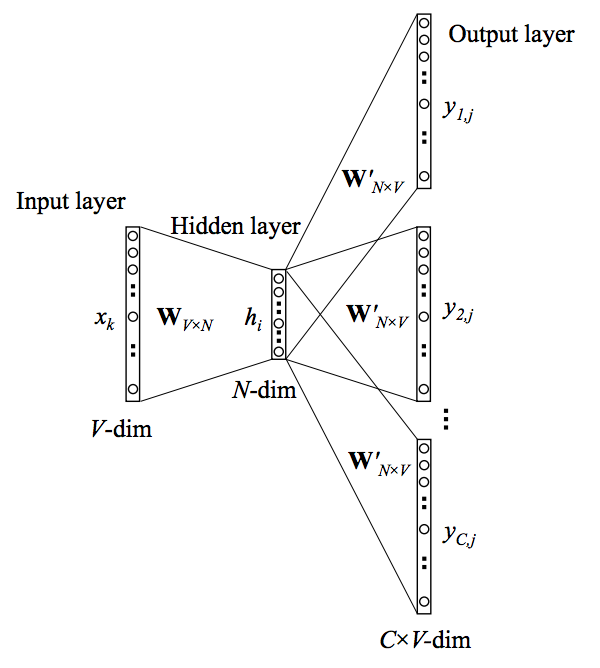

In [ ]:
# Author: Srijith Rajamohan

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import urllib.request
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk import word_tokenize
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances

torch.manual_seed(1)

CONTEXT_SIZE = 3
EMBEDDING_DIM = 10

def get_key(word_id):
    for key,val in word_to_ix.items():
        if(val == word_id):
            print(key)


def cluster_embeddings(filename,nclusters):
    X = np.load(filename)
    kmeans = KMeans(n_clusters=nclusters, random_state=0).fit(X)
    center = kmeans.cluster_centers_
    distances = euclidean_distances(X,center)

    for i in np.arange(0,distances.shape[1]):
        word_id = np.argmin(distances[:,i])
        print(word_id)
        get_key(word_id)

def read_data(file_path):
    tokenizer = RegexpTokenizer(r'\w+')
    data = urllib.request.urlopen(file_path)
    data = data.read().decode('utf8')
    tokenized_data = word_tokenize(data)
    stop_words = set(stopwords.words('english'))
    stop_words.update(['.',',',':',';','(',')','#','--','...','"'])
    cleaned_words = [ i for i in tokenized_data if i not in stop_words ]
    return(cleaned_words)


test_sentence = """Empathy for the poor may not come easily to people who never experienced it. They may blame the victims and insist their predicament can be overcome through determination and hard work.
But they may not realize that extreme poverty can be psychologically and physically incapacitating — a perpetual cycle of bad diets, health care and education exacerbated by the shaming and self-fulfilling prophecies that define it in the public imagination.
Gordon Parks — perhaps more than any artist — saw poverty as “the most savage of all human afflictions” and realized the power of empathy to help us understand it. It was neither an abstract problem nor political symbol, but something he endured growing up destitute in rural Kansas and having spent years documenting poverty throughout the world, including the United States.
That sensitivity informed “Freedom’s Fearful Foe: Poverty,” his celebrated photo essay published in Life magazine in June 1961. He took readers into the lives of a Brazilian boy, Flavio da Silva, and his family, who lived in the ramshackle Catacumba favela in the hills outside Rio de Janeiro. These stark photographs are the subject of a new book, “Gordon Parks: The Flavio Story” (Steidl/The Gordon Parks Foundation), which accompanies a traveling exhibition co-organized by the Ryerson Image Centre in Toronto, where it opens this week, and the J. Paul Getty Museum. Edited with texts by the exhibition’s co-curators, Paul Roth and Amanda Maddox, the book also includes a recent interview with Mr. da Silva and essays by Beatriz Jaguaribe, Maria Alice Rezende de Carvalho and Sérgio Burgi.
""".split()
# we should tokenize the input, but we will ignore that for now
# build a list of tuples.  Each tuple is ([ word_i-2, word_i-1 ], target word)

#test_sentence = read_data('https://www.gutenberg.org/files/57884/57884-0.txt')

ngrams = []
for i in range(len(test_sentence) - CONTEXT_SIZE):
    tup = [test_sentence[j] for j in np.arange(i + 1 , i + CONTEXT_SIZE + 1) ]
    ngrams.append((test_sentence[i],tup))
# print the first 3, just so you can see what they look like
#print(ngrams)


vocab = set(test_sentence)
print("Length of vocabulary",len(vocab))
word_to_ix = {word: i for i, word in enumerate(vocab)}


class SkipgramModeler(nn.Module):

    def __init__(self, vocab_size, embedding_dim, context_size):
        super(SkipgramModeler, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(embedding_dim, 128)
        self.linear2 = nn.Linear(128, context_size * vocab_size)
        #self.parameters['context_size'] = context_size

    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((1, -1))  # -1 implies size inferred for that index from the size of the data
        #print(np.mean(np.mean(self.linear2.weight.data.numpy())))
        out1 = F.relu(self.linear1(embeds)) # output of first layer
        out2 = self.linear2(out1)           # output of second layer
        #print(embeds)
        log_probs = F.log_softmax(out2, dim=1).view(CONTEXT_SIZE,-1)
        return log_probs

    def predict(self,input):
        context_idxs = torch.tensor([word_to_ix[input]], dtype=torch.long)
        res = self.forward(context_idxs)
        res_arg = torch.argmax(res)
        res_val, res_ind = res.sort(descending=True)
        indices = [res_ind[i][0] for i in np.arange(0,3)]
        for arg in indices:
            print( [ (key, val) for key,val in word_to_ix.items() if val == arg ])


    def freeze_layer(self,layer):
        for name,child in model.named_children():
            print(name,child)
            if(name == layer):
                for names,params in child.named_parameters():
                    print(names,params)
                    print(params.size())
                    params.requires_grad= False

    def print_layer_parameters(self):
        for name,child in model.named_children():
                print(name,child)
                for names,params in child.named_parameters():
                    print(names,params)
                    print(params.size())

    def write_embedding_to_file(self,filename):
        for i in self.embeddings.parameters():
            weights = i.data.numpy()
        np.save(filename,weights)


losses = []
loss_function = nn.NLLLoss()
model = SkipgramModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Freeze embedding layer
#model.freeze_layer('embeddings')

for epoch in range(550):
    total_loss = 0
    #------- Embedding layers are trained as well here ----#
    #lookup_tensor = torch.tensor([word_to_ix["poor"]], dtype=torch.long)
    #hello_embed = model.embeddings(lookup_tensor)
    #print(hello_embed)
    # -----------------------------------------------------#

    model.predict('psychologically')

    for context, target in ngrams:

        # Step 1. Prepare the inputs to be passed to the model (i.e, turn the words
        # into integer indices and wrap them in tensors)
        #print(context,target)


        context_idxs = torch.tensor([word_to_ix[context]], dtype=torch.long)
        #print("Context id",context_idxs)

        # Step 2. Recall that torch *accumulates* gradients. Before passing in a
        # new instance, you need to zero out the gradients from the old
        # instance
        model.zero_grad()

        # Step 3. Run the forward pass, getting log probabilities over next
        # words
        log_probs = model(context_idxs)
        #print(log_probs)

        # Step 4. Compute your loss function. (Again, Torch wants the target
        # word wrapped in a tensor)
        target_list = torch.tensor([word_to_ix[w] for w in target], dtype=torch.long)
        loss = loss_function(log_probs, target_list)
        #print(loss)

        # Step 5. Do the backward pass and update the gradient
        loss.backward()
        optimizer.step()

        # Get the Python number from a 1-element Tensor by calling tensor.item()
        total_loss += loss.item()
    print(total_loss)
    losses.append(total_loss)
#print(losses)  # The loss decreased every iteration over the training data!

#Print the model layer parameters
#model.print_layer_parameters()

#Predict the next word given n context words
model.predict('psychologically')
model.write_embedding_to_file('embeddings_skipgrams.npy')
cluster_embeddings('embeddings_skipgrams.npy',5)

## CBOW

หลังจากที่ได้ศึกษา TF-IDF เรามาดูเจ้า CBOW กันดูสักหน่อย เนื่องจากว่า เรายังไม่ได้เรียน Neural Network ก็อาจจะงงๆ แต่เดี๋ยวก่อนไม่ยากอย่างที่คิด ไปลุยกันเลย

เดี๋ยวเราจะลองดูโค้ดที่นี่นะครับ https://github.com/FraLotito/pytorch-continuous-bag-of-words

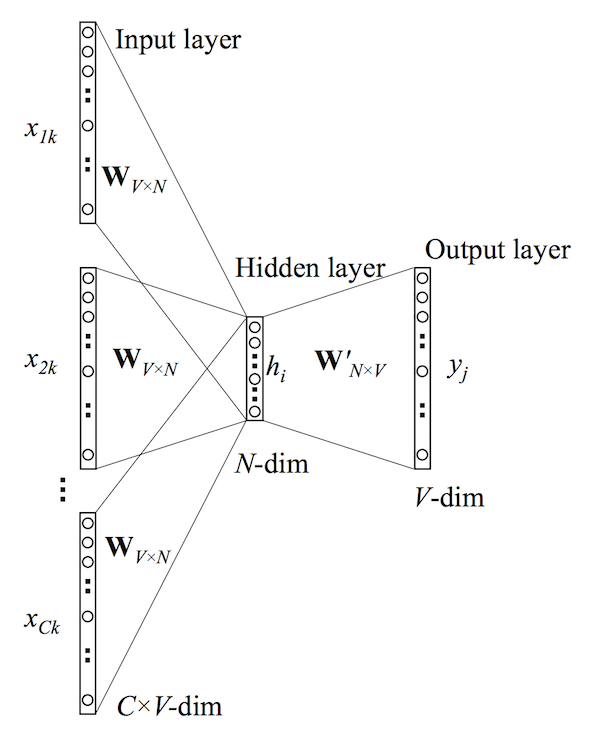

In [ ]:

import torch
import torch.nn as nn

def make_context_vector(context, word_to_ix):
    idxs = [word_to_ix[w] for w in context]
    return torch.tensor(idxs, dtype=torch.long)

CONTEXT_SIZE = 2  # 2 words to the left, 2 to the right
EMDEDDING_DIM = 100

raw_text = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells.""".split()


# By deriving a set from `raw_text`, we deduplicate the array
vocab = set(raw_text)
vocab_size = len(vocab)

word_to_ix = {word:ix for ix, word in enumerate(vocab)}
ix_to_word = {ix:word for ix, word in enumerate(vocab)}

data = []
for i in range(2, len(raw_text) - 2):
    context = [raw_text[i - 2], raw_text[i - 1],
               raw_text[i + 1], raw_text[i + 2]]
    target = raw_text[i]
    data.append((context, target))

In [ ]:
class CBOW(torch.nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(CBOW, self).__init__()

        #out: 1 x emdedding_dim
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(embedding_dim, 128)
        self.activation_function1 = nn.ReLU()

        #out: 1 x vocab_size
        self.linear2 = nn.Linear(128, vocab_size)
        self.activation_function2 = nn.LogSoftmax(dim = -1)


    def forward(self, inputs):
        embeds = sum(self.embeddings(inputs)).view(1,-1)
        out = self.linear1(embeds)
        out = self.activation_function1(out)
        out = self.linear2(out)
        out = self.activation_function2(out)
        return out

    def get_word_emdedding(self, word):
        word = torch.tensor([word_to_ix[word]])
        return self.embeddings(word).view(1,-1)



In [ ]:
model = CBOW(vocab_size, EMDEDDING_DIM)

loss_function = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

#TRAINING
for epoch in range(50):
    total_loss = 0

    for context, target in data:
        context_vector = make_context_vector(context, word_to_ix)

        log_probs = model(context_vector)

        total_loss += loss_function(log_probs, torch.tensor([word_to_ix[target]]))

    #optimize at the end of each epoch
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()

In [ ]:
#TESTING
model.eval()
context = ['People','create','to', 'direct']
context_vector = make_context_vector(context, word_to_ix)
a = model(context_vector)

#Print result
print(f'Raw text: {" ".join(raw_text)}\n')
print(f'Context: {context}\n')
print(f'Prediction: {ix_to_word[torch.argmax(a[0]).item()]}')



In [ ]:
#ต้องการเอา word embedding ออกมา
w_id = word_to_ix["create"]
print(w_id)

clone_w = model.embeddings.weight.clone()

print(clone_w.shape)
print(len(list(word_to_ix.keys())))

#word vector of the word "create" is
print(clone_w[w_id])